# Ejercicio 6, Tema 2
---
## Comunicaciones Móviles (curso 2020-2021), 4º curso
---
Grado en Ingeniería de Sistemas de Telecomunicación (Universidad de Málaga)
---


# Enunciado
En un entorno urbano, empleando el modelo de Okumura-Hata, para una frecuencia de 900 MHz y una altura del móvil de 1.5 m, represente el índice $n$ de propagación en función de la altura de la antena transmisora (de 20 a 300 m).

El índice $n$ es el que aparece en las expresiones de $L_{50}$ como:

$L_{50}(dB) = k + 10 \cdot n\cdot log(d)$, siendo $d$ la distancia.

## Modelo empírico de Okumura-Hata para entornos urbanos
$L_{50}(urbano) = 69.65 +26.16 \cdot log(f) - 13.82 \cdot log(h_{te}) - a(h_{re}) + (44.9 - 6.55 \cdot log(h_{te})) \cdot log(d)$

## Módulos utilizados

In [1]:
!pip install matplotlib-label-lines

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines

## Datos de partida

In [3]:
f = 900                               # Frecuencia de operación [MHz]
h_te = np.array(range(30, 200 + 1))   # Altura de la antena transmisora [m]
h_re = 1.5                            # Altura de la antena receptora [m]
d_array = np.array(range(1, 20 + 1))  # Distancia [km]
a = 0                                 # Correción por altura del móvil

In [4]:
# Preasignación
L = np.zeros((len(d_array), len(h_te)))

In [5]:
# Cálculo de la atenuación para distintas distancias
for i in range(len(d_array)):
  L[i,:] = 69.55 + 26.16 * np.log10(f) - 13.82 * np.log10(h_te) - a + (44.9 - 6.55 * np.log10(h_te)) * np.log10(d_array[i])

## Visualización

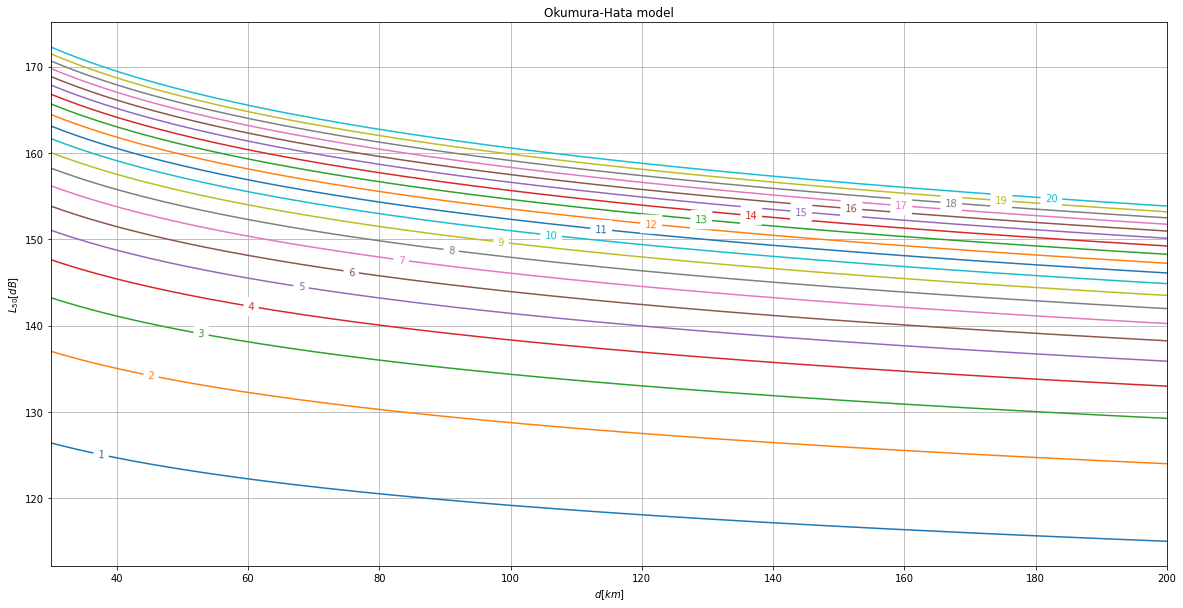

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

for i in range(len(d_array)):
  # Hay una curva para cada valor de la distancia (1-20 km)
  plt.plot(h_te, L[i,:], label=str(i+1))

# Etiquetas de distancia [km]
labelLines(plt.gca().get_lines(), xvals=(30, 190), zorder=2.5)

ax.set_xlim(h_te[0], h_te[-1])
ax.set_xlabel('$d [km]$')
ax.set_ylabel('$L_{50} [dB]$')
ax.set_title('Okumura-Hata model')
ax.grid(True)

plt.show()